### During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA

### E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ

This data set has the information on the GRE,TOEFL,CGPA and other details of students seeking Post graduation admission at Universities.We will try to exprole the data and see what we can understand from it.The deeper question would be are college degrees revalent in the era of Nano degrees? In this kernel we will be covering following things.

1.Data Import and Pre Processing 

2.Exploratory Data Analysis 

3.Machine Learning Model Build 

4.Conclusion 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Admission_Predict.csv', 'Admission_Predict_Ver1.1.csv']


**Importing the modules needed for the analysis **

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os
import warnings
warnings.filterwarnings('ignore') 
#plt.style.use('seaborn')
plt.style.use('fivethirtyeight')

**Importing the data into kernel**

In [3]:
admt=pd.read_csv('../input/Admission_Predict.csv')

In [4]:
admt.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
admt.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

We can see that there are no missing values in the data set.

**Summary Of Dataset**

In [6]:
print('Rows     :',admt.shape[0])
print('Columns  :',admt.shape[1])
print('\nFeatures :\n     :',admt.columns.tolist())
print('\nMissing values    :',admt.isnull().values.sum())
print('\nUnique values :  \n',admt.nunique())

Rows     : 400
Columns  : 9

Features :
     : ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

Missing values    : 0

Unique values :  
 Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64


### Renaming the columns to make our lives easy

In [7]:
admt.columns.to_frame().T

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


### Displaying columns in dataset 

In [8]:
admt.count().to_frame().T

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,400,400,400,400,400,400,400,400,400


Above method can be used to find out the rows of values in the data set.

In [9]:
print("There are",len(admt.columns),"columns:")
for x in admt.columns:
    sys.stdout.write(str(x)+", ")                                                      #admt.columns also works 

There are 9 columns:
Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit , 

Looking at the column names we can see that we can make the names of the colums shorter.

In [10]:
admt.rename(columns={'Serial No.':'Srno','GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'UnivRating','Chance of Admit ':'Chance'},inplace=True)

In [11]:
admt.head()

,Srno,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


We can see that the name of the columns have be changed as per our convience.We can see that first  column is serial number it will not have any effect on the chance of admission to the University.We better drop the column of serial number from the data set.

In [12]:
admt.columns

Index(['Srno', 'GRE', 'TOEFL', 'UnivRating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance'],
      dtype='object')

### Dropping Unwanted Columns

In [13]:
admt.drop('Srno', axis=1, inplace=True)
admt.head()

,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


We can see that the column for serial number is droped or removed from the dataset.

# 2.Exploratory Data Analysis

### Describing the Dataset

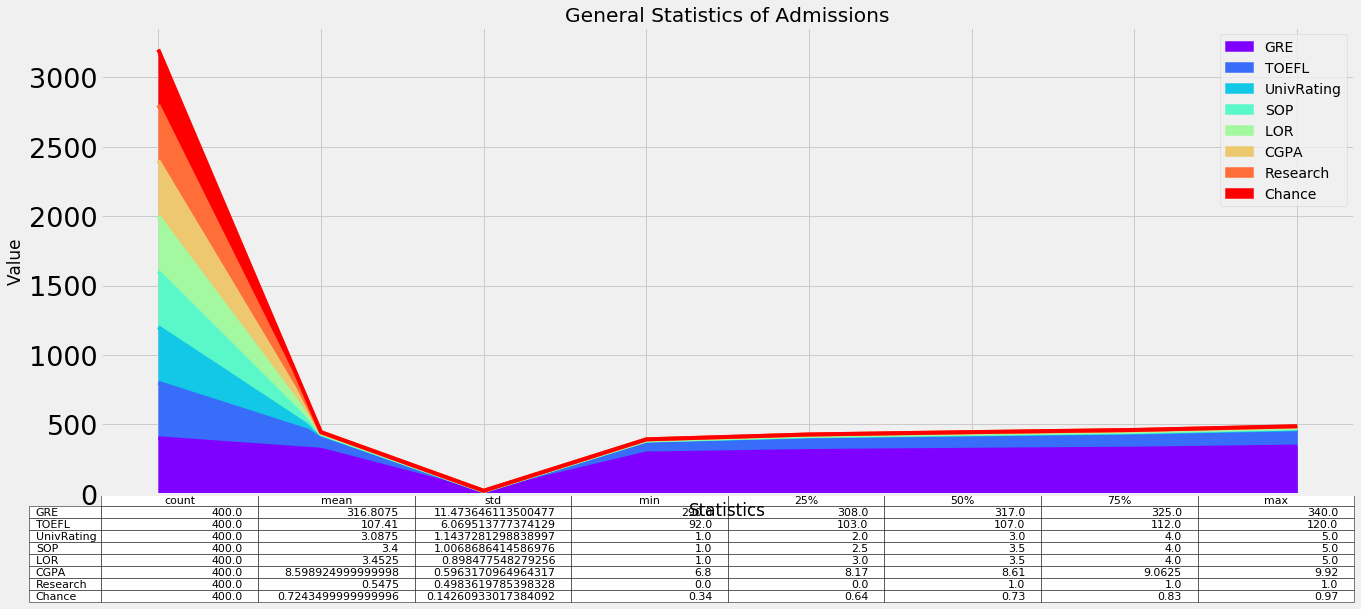

In [14]:
admt.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Admissions")
plt.show()

We can display describe dunction in pictorial way.In most cases the describle table is sufficient for us the get valuable information about the data.

### Box Plot

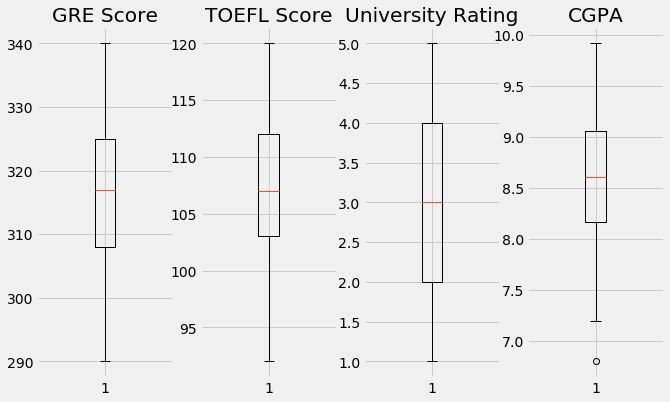

In [15]:
plt.figure(1, figsize=(10,6))
plt.subplot(1,4, 1)
plt.boxplot(admt['GRE'])
plt.title('GRE Score')

plt.subplot(1,4,2)
plt.boxplot(admt['TOEFL'])
plt.title('TOEFL Score')

plt.subplot(1,4,3)
plt.boxplot(admt['UnivRating'])
plt.title('University Rating')

plt.subplot(1,4,4)
plt.boxplot(admt['CGPA'])
plt.title('CGPA')

plt.show()


Above box plot shows us the min,median and max values for GRE,TOEFL,University rating and CGPA for the dataset.

### Correlation Plot

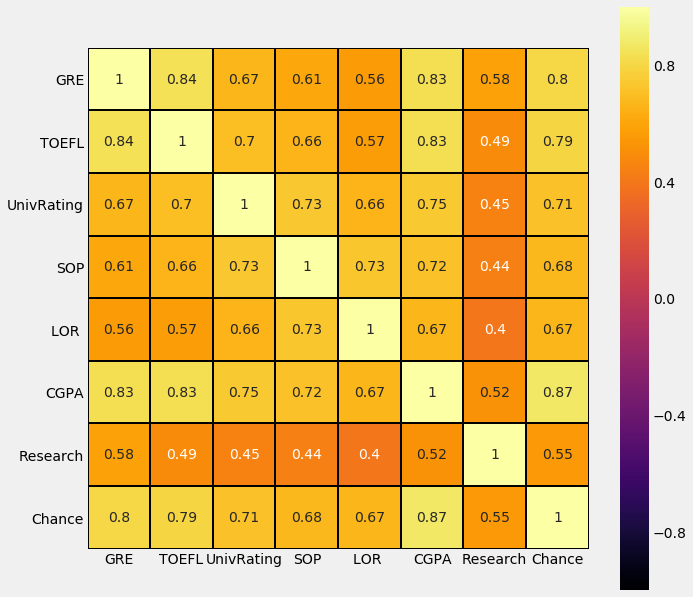

In [16]:
fig=plt.gcf()
fig.set_size_inches(10,10)
fig=sns.heatmap(admt.corr(),annot=True,cmap='inferno',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

Heat map gives a good pictorial representation of the correlation of features to our target value chance of admit to university.Looking at the heat map to get the correlation can sometimes be condusing.One way out would be the to get the correlation values against target(Chance) as shown below.

### Getting Correlation Values

In [17]:
#correlations_data = admt.corr()['Chance'].sort_values(ascending=False)
cor=admt.corr()['Chance']
# Print the correlations
print(cor)

GRE           0.802610
TOEFL         0.791594
UnivRating    0.711250
SOP           0.675732
LOR           0.669889
CGPA          0.873289
Research      0.553202
Chance        1.000000
Name: Chance, dtype: float64


We can see that CGPA,GRE,TOEFL,University Ranking has the highest correlation with the chance of admission to the university.The other parameters like SOP,LOR and Research has less impact on the chance of admission.We can dropt he column Srno from our dataframe as it doesnt have any impact on the chance of admission.

### Distribution Plot

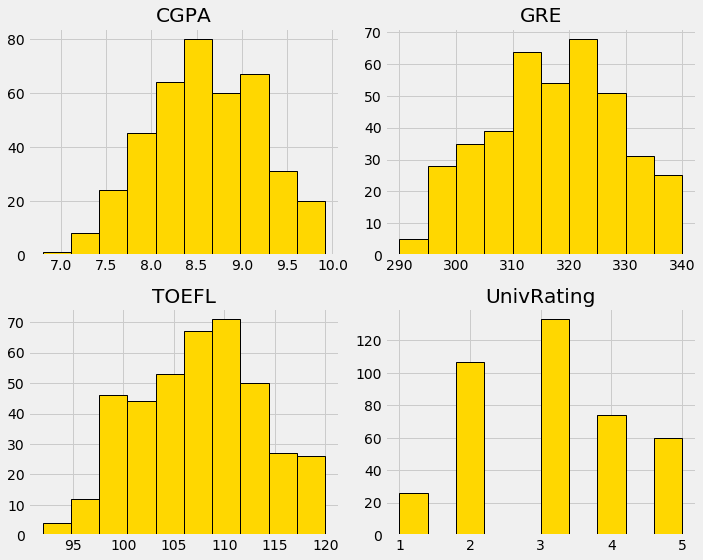

In [18]:
admt[['GRE','TOEFL','UnivRating','CGPA']].hist(figsize=(10,8),bins=10,color='#ffd700',linewidth='1',edgecolor='k')
plt.tight_layout()
plt.show()

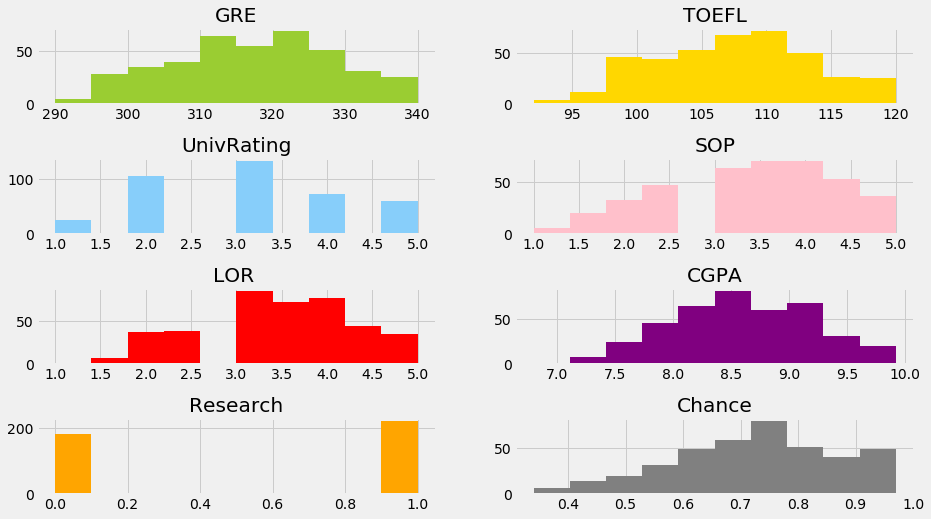

In [19]:
category = ['GRE','TOEFL','UnivRating','SOP','LOR ','CGPA','Research','Chance']
color = ['yellowgreen','gold','lightskyblue','pink','red','purple','orange','gray']
start = True
for i in np.arange(4):
    
    if start == True:
        fig = plt.figure(figsize=(14,8))
        start = False
        
    plt.subplot2grid((4,2),(i,0))
    admt[category[2*i]].hist(color=color[2*i],bins=10)
    plt.title(category[2*i])
    plt.subplot2grid((4,2),(i,1))
    admt[category[2*i+1]].hist(color=color[2*i+1],bins=10)
    plt.title(category[2*i+1])
    
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)    
plt.show()

In [20]:
print('Mean CGPA Score is :',int(admt[admt['CGPA']<=500].CGPA.mean()))
print('Mean GRE Score is :',int(admt[admt['GRE']<=500].GRE.mean()))
print('Mean TOEFL Score is :',int(admt[admt['TOEFL']<=500].TOEFL.mean()))
print('Mean University rating is :',int(admt[admt['UnivRating']<=500].UnivRating.mean()))

Mean CGPA Score is : 8
Mean GRE Score is : 316
Mean TOEFL Score is : 107
Mean University rating is : 3


Target of an aspirant would be get more than the mean scores displayed above.

### How important is Research to get an Admission?

In [21]:
a=len(admt[admt.Research==1])
b=len(admt[admt.Research==0])
print('Total number of students',a+b)
print('Students having Research:',len(admt[admt.Research==1]))
print('Students not having Research:',len(admt[admt.Research==0]))

Total number of students 400
Students having Research: 219
Students not having Research: 181


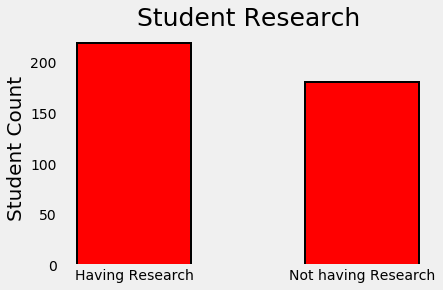

In [22]:
y=np.array([len(admt[admt.Research==1]),len(admt[admt.Research==0])])
x=['Having Research','Not having Research']
ax=plt.bar(x,y,width=0.5,color='red',edgecolor='k',align='center',linewidth=2)
#plt.xlabel('',fontsize=20)
plt.ylabel('Student Count',fontsize=20)
#ax.tick_params(labelsize=20)
plt.title('Student Research',fontsize=25)
plt.grid()
plt.ioff()

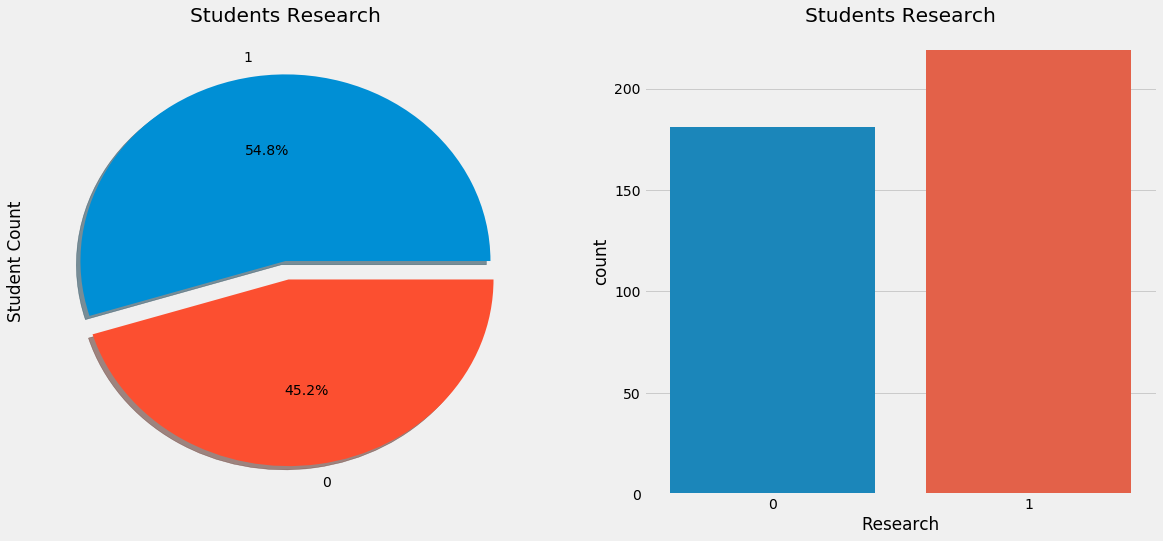

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))
admt['Research'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Students Research')
ax[0].set_ylabel('Student Count')
sns.countplot('Research',data=admt,ax=ax[1])
ax[1].set_title('Students Research')
plt.show()

We can see that 55% Students have done Research.It possible only the better student could get a chance for doing research.Doing research does add practical knowledge and increases the student skill of working with groups or teams.

### Scatter Plot

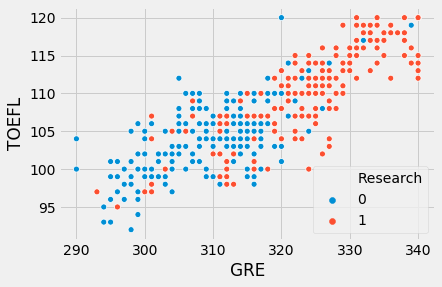

In [24]:
sns.scatterplot(data=admt,x='GRE',y='TOEFL',hue='Research')
plt.show()

We can see that stutents who have done research do have good TOEFL and GRE Score.

**Chance of admission**

We are assuming here that students with 0.7 chance of admission have secured admission.We create another column in oour dataset named Admit.The value of Admit=1 if Chance>0.7 and Admit=0 if Chance<0.7.

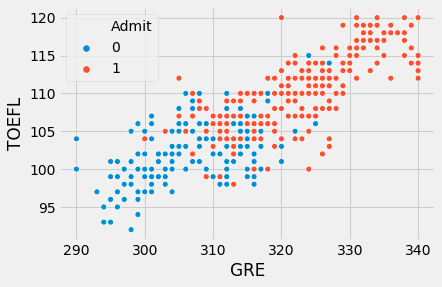

In [25]:
def modiffy(row):
    if row['Chance'] >0.7 :
        return 1
    else :
        return 0
admt['Admit'] = admt.apply(modiffy,axis=1)
admttemp = admt.drop(['Chance'], axis=1)
#sns.pairplot(admttemp,hue='Admit')
sns.scatterplot(data=admttemp,x='GRE',y='TOEFL',hue='Admit')
del admttemp

We can clearly see that students with higher GRE and TOEFL scores have very high chance of getting an university admission.

### Factor Plot

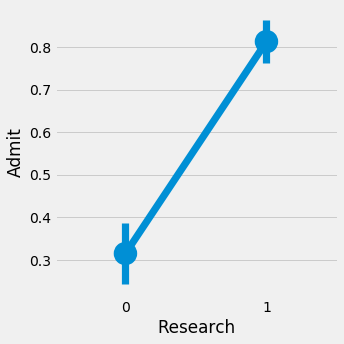

In [26]:
sns.factorplot('Research','Admit',data=admt)
plt.show()

Yes your chance of Admission increases if you do Research.

### What should be your Scores for fore than 90 % Chance of Admission?

In [27]:
admt_sort=admt.sort_values(by=admt.columns[-1],ascending=False)
admt_sort.head()
#admt.head()
#admttemp.head()

,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92,1
222,324,113,4,4.5,4.0,8.79,0,0.76,1
235,326,111,5,4.5,4.0,9.23,1,0.88,1
234,330,113,5,5.0,4.0,9.31,1,0.91,1
231,319,106,3,3.5,2.5,8.33,1,0.74,1


We can see that the maximum Chance of admission is 0.97.Lets find out the scores needed for 90 % chance of admission.

In [28]:
admt_sort[(admt_sort['Chance']>0.90)].mean().reset_index()

,index,0
0,GRE,333.612245
1,TOEFL,116.285714
2,UnivRating,4.653061
3,SOP,4.561224
4,LOR,4.479592
5,CGPA,9.536939
6,Research,1.000000
7,Chance,0.937551
8,Admit,1.000000


For having a 90% Chance to get admission one should have GRE=333.61,TOEFL=116.28,CGPA=9.53 .If you get scores more than this then your chances of admission are very good.

### Violin Plots

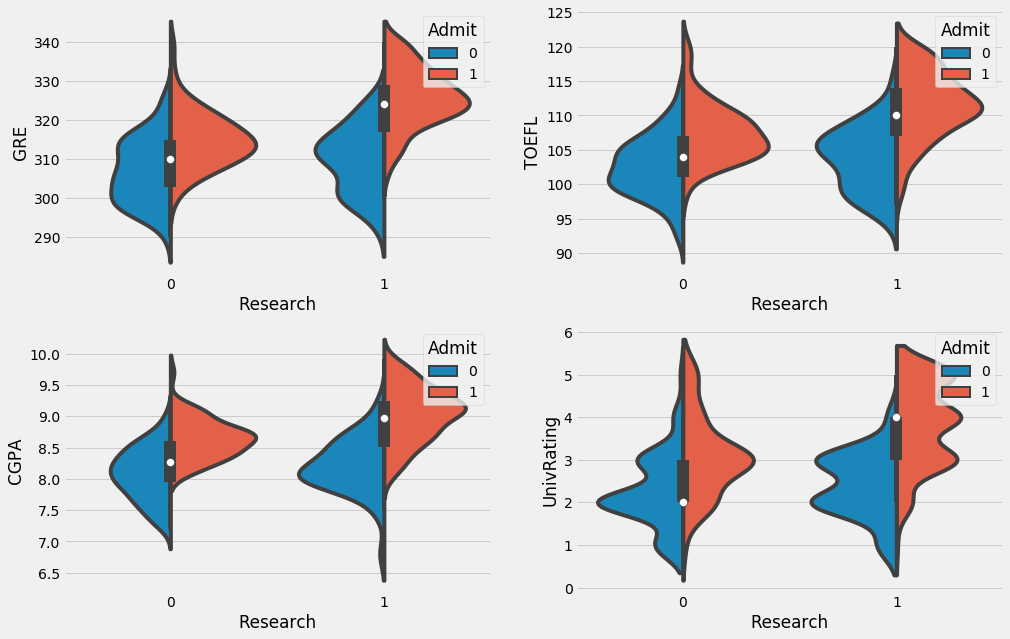

In [29]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot("Research","GRE",hue="Admit", data=admt,split=True)
plt.subplot(2,2,2)
sns.violinplot("Research","TOEFL",hue="Admit", data=admt,split=True)
plt.subplot(2,2,3)
sns.violinplot("Research","CGPA",hue="Admit", data=admt,split=True)
plt.subplot(2,2,4)
sns.violinplot("Research","UnivRating",hue="Admit", data=admt,split=True)
#ax[0].set_title('Pclass and Age vs Survived')
#ax[0].set_yticks(range(0,110,10))
#sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
#ax[1].set_title('Sex and Age vs Survived')
#ax[1].set_yticks(range(0,110,10))
plt.ioff()
plt.show()


We can clearly see that the student with research have higher chance of admission and their overall all GRE,TOEFL and CPGA scores are also high.

### Pie and Count Plot

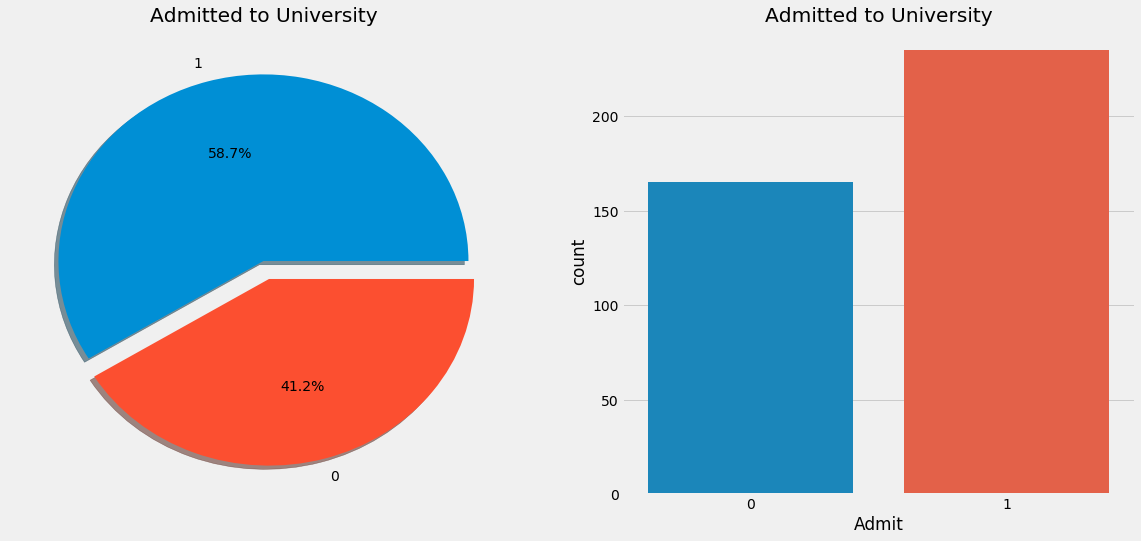

In [30]:
f,ax=plt.subplots(1,2,figsize=(18,8))
admt['Admit'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Admitted to University')
ax[0].set_ylabel('')
sns.countplot('Admit',data=admt,ax=ax[1])
ax[1].set_title('Admitted to University')
plt.show()

We can see that 59% of the student have high chance of Admission.

# 3.Machine Learning Model Build 

In [31]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix


In [32]:
#admt.head()

### Matrix of Features

In [33]:
X=admt.iloc[:,:-2].values
#X[0]
y=admt.iloc[:,-2].values # or we can use y=data.iloc[:,3].values
#y[0]

### Splitting the Data 

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=0)

## 1.Linear Regression

In [35]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Accuracy Score

In [36]:
pred1=reg.predict(X_test)
print("Mean Squared Error: ",mean_squared_error(y_test,pred1))
#('Accuracy for Linear Regression is ',metrics.accuracy_score(y_pred,y_test))

Mean Squared Error:  0.005072474069100753


The test values from the dataset are :

In [37]:
y_test

array([0.71, 0.7 , 0.79, 0.73, 0.72, 0.48, 0.77, 0.71, 0.9 , 0.94, 0.58,
       0.89, 0.72, 0.57, 0.78, 0.42, 0.64, 0.84, 0.63, 0.72])

The Values predicted by Linear regression are :

In [38]:
pred1

array([0.69918594, 0.69766111, 0.77775345, 0.61696188, 0.7210226 ,
       0.60051294, 0.70861017, 0.64184881, 0.87126759, 0.92122289,
       0.54186308, 0.88390553, 0.70891684, 0.45738279, 0.85482346,
       0.62160959, 0.62570982, 0.81035175, 0.58028623, 0.73367226])

Predicting the chance for a use case.We give the input to the algorithm in the form of a list as shown below.

In [39]:
Score=['337','118','4','4.5','4.5','9.65','1']
Score=pd.DataFrame(Score).T
chance=reg.predict(Score)
chance

array([0.95136698])

So the algrothim predicts the value as 0.95 against the actual value 0.92

### Predicted Vs Actual 

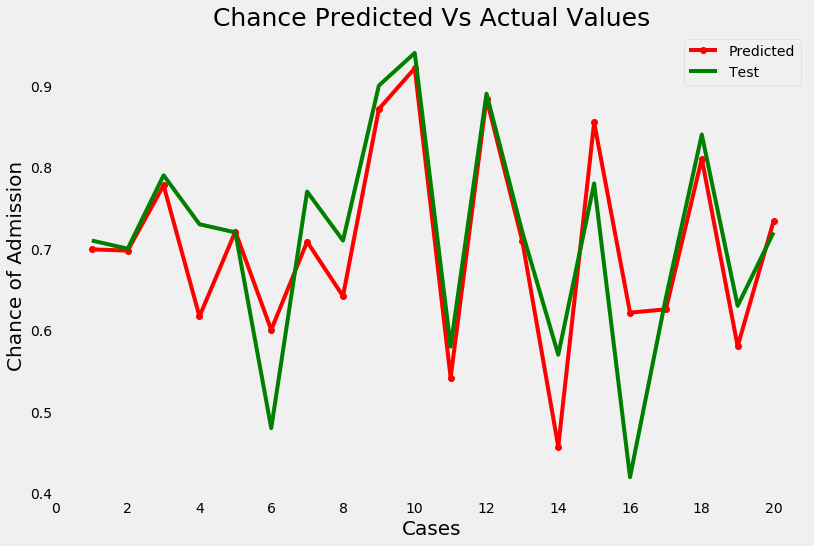

In [40]:
plt.figure(figsize=(12,8))
y=pred1
y1=y_test
x=np.arange(1, 21, 1)
x1=np.arange(0,21,2)
plt.plot(x,y,color='r',marker='o',label='Predicted')
plt.plot(x,y1,color='g',label='Actual')
plt.xticks(x1)
plt.gca().legend(('Predicted','Test'))
plt.xlabel('Cases',fontsize=20)
plt.ylabel('Chance of Admission',fontsize=20)
plt.title('Chance Predicted Vs Actual Values',fontsize=25)
plt.grid()
plt.ioff()

We can see from the above plot that we have fairly good correlation.

## 2.Decision Tree

In [41]:
#admt.head()

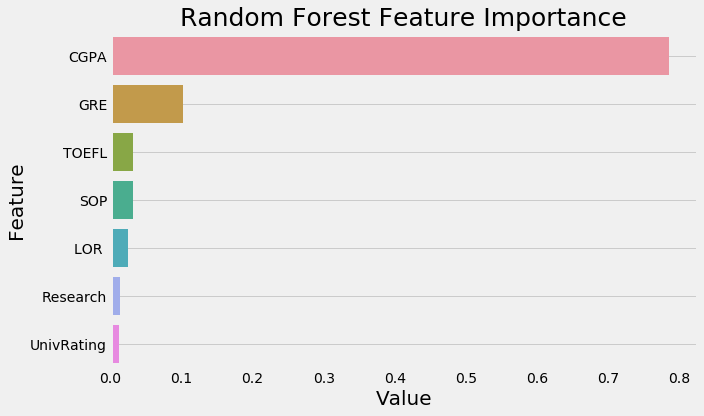

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 1000,random_state = 123)
columns = ['Admit']
admt.drop(columns, inplace=True, axis=1)
X = admt.drop('Chance',axis = 1)
y = admt['Chance']
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = .25,random_state = 123)
rf_model = RandomForestRegressor(n_estimators = 1000,random_state = 123)
rf_model.fit(X_train,y_train)
feature_importance = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.xlabel('Value',fontsize=20)
plt.ylabel('Feature',fontsize=20)
plt.title('Random Forest Feature Importance',fontsize=25)
plt.grid()
plt.ioff()
plt.tight_layout()

We can see CGPA,GRE,TOEFL and SOP arte most important features in the data set.

## 3.Logistic Regression:
It is used to predict binary results.In this case we have crerated the column Admit which tells us detail of Whether the candidate has got admission(1) or not (0).We have seen from the decision tree algorithm that CGPA and the GRE Score has the highest influence on the chance of admission.So while making a Logistic Regression we will use the values of CGPA and GRE score to predict the Admission to the University 

### Generating Array of Features and Target Values

In [43]:
#admt.head()

In [44]:
X=admt_sort.iloc[:,[0,5]].values    # O represents GRE Score and 5 represnts CGPA 
y=admt_sort.iloc[:,8].values        # 8 tells us if the Candidate got Admission or not 


In [45]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
Y = lab_enc.fit_transform(y)

### Splitting the dataset to Train and Test Set

In [46]:
from sklearn.model_selection import train_test_split   #cross_validation doesnt work any more
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0) 
#y_train

### Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
#X_train

### Fitting Logistic Regression into Training set

In [48]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Predicting the test set results

In [49]:
y_pred=classifier.predict(X_test)

### Making the confusion matrix

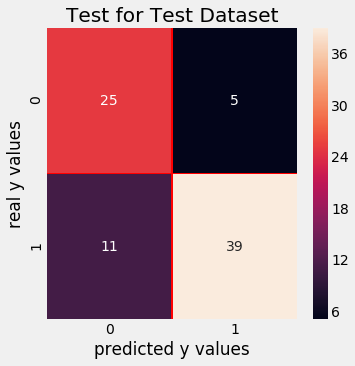

In [50]:
from sklearn.metrics import confusion_matrix  #Class has capital at the begining function starts with small letters 
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

Correct predictions =28+39=64 

Wrong predictions =6+7=13

Accuracy =(64/77)*100 =83.11 %

### Visualizing the Training Set Results

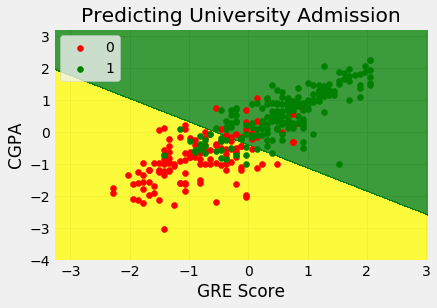

In [51]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('yellow','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Predicting University Admission')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.legend()
plt.show()

### Visualizing the Test Set Results

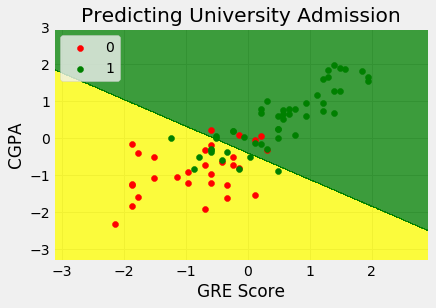

In [52]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('yellow','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Predicting University Admission')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.legend()
plt.show()

The Yellow region is the area of people who failed to get admission.Red dots represent the students who failed to get admission.
Green Dotd and Green Area represent the people who Managed to get admission.

0-Not Admitted 

1-Admitted 


## 4. K Means Classification 

### Fitting K Nearest  Neighbor to Training set

In [53]:
from sklearn.neighbors import KNeighborsClassifier
classifier_4=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier_4.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Predicting the test set results

In [54]:
y_pred_4=classifier_4.predict(X_test)

### 4.3 Making the confusion matrix

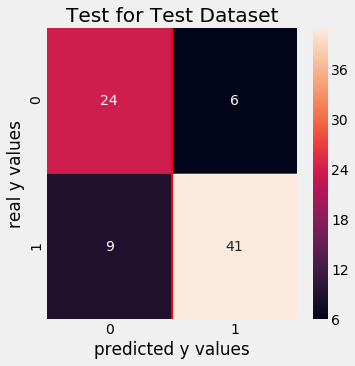

In [55]:
from sklearn.metrics import confusion_matrix  #Class has capital at the begining function starts with small letters 
cm=confusion_matrix(y_test,y_pred_4)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

Correct predictions =24+41=65

Wrong predictions =6+9=15

Accuracy = (65/180)*100 =81. 25 %

### Visualizing the Training Set Results

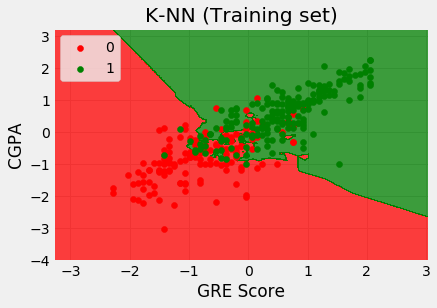

In [56]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier_4.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('K-NN (Training set)')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.legend()
plt.show()

### Visualizing the Test Set Results

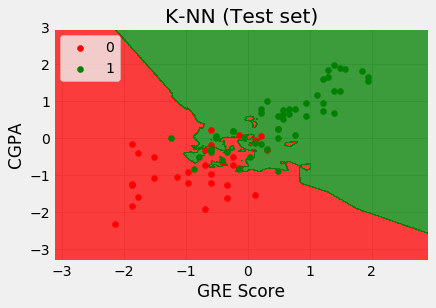

In [57]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier_4.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('K-NN (Test set)')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.legend()
plt.show()

## 5. K Means Clustering:
K means is an unsupervised clustering algorithm.We use it here to see how the students will be getting clustered based on their GRE and CGPA Scores.

### 5.1 Generating the Array of Features

In [58]:
X=admt_sort.iloc[:,[0,5]].values 
#X

### 5.2 Using Elbow method to find the optiminal cluster number

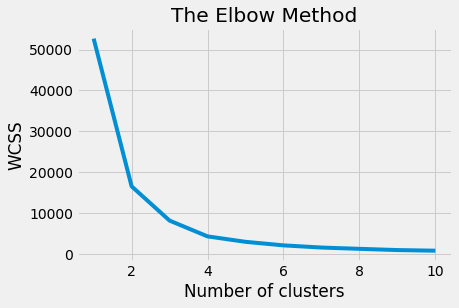

In [59]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the Elbow plot we can see that four could be the optiminal number of cluster for this analysis.

### 5.3. Applying K means to the Dataset

In [60]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

### Visualizing the clusters

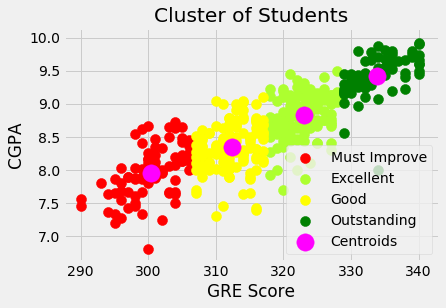

In [61]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Must Improve') 
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='greenyellow',label='Excellent')  
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='yellow',label='Good')   
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='green',label='Outstanding')  #cyan
#plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='magenta',label='Centroids')
plt.title('Cluster of Students')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.legend()
plt.show()

Based on the cluster I have catogerised the students into four catogeries.

1.Outstanding - GRE> 327 + and CGPA > 8.5

2.Ecxcellent -GRE> 317 + and CGPA > 7.7

3.Good -GRE> 306 + and CGPA > 7.3

4.Must Improve -GRE> 290 + and CGPA > 6.7

## 6. Artificial Neural Network (ANN)

### Generating the Array of Features and Target Values

In [62]:
admt_sort.head()

,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92,1
222,324,113,4,4.5,4.0,8.79,0,0.76,1
235,326,111,5,4.5,4.0,9.23,1,0.88,1
234,330,113,5,5.0,4.0,9.31,1,0.91,1
231,319,106,3,3.5,2.5,8.33,1,0.74,1


In [63]:
X=admt_sort.iloc[:,0:8].values

y=admt_sort.iloc[:,8].values
#X
#y

### Splitting the dataset to Train and Test Set

In [64]:
from sklearn.model_selection import train_test_split   #cross_validation doesnt work any more
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 
#X_train

### Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
#X_train

### Importing the Keras Library

In [66]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense 

Using TensorFlow backend.


### 6.5 Initialising the ANN

In [67]:
classifier_6=Sequential()

### 6.6 Adding the input layer and the first hidden layer

In [68]:
classifier_6.add(Dense(output_dim=6,init='uniform',activation='relu',input_dim=8))

**6.7 Adding the second hidden Layer**

In [69]:
classifier_6.add(Dense(output_dim=5,init='uniform',activation='relu'))

### 6.8 Adding the output layer

In [70]:
classifier_6.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))

**6.9 Compliling the ANN**

In [71]:
classifier_6.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### 6.10 Fitting the ANN to training set

In [72]:
classifier_6.fit(X_train, y_train,batch_size=10,nb_epoch=100)

Epoch 1/100
320/320 [==============================] - 3s 8ms/step - loss: 0.6923 - acc: 0.5656
Epoch 2/100
320/320 [==============================] - 0s 280us/step - loss: 0.6887 - acc: 0.6531
Epoch 3/100
320/320 [==============================] - 0s 285us/step - loss: 0.6758 - acc: 0.8437
Epoch 4/100
320/320 [==============================] - 0s 286us/step - loss: 0.6452 - acc: 0.8750
Epoch 5/100
320/320 [==============================] - 0s 282us/step - loss: 0.6010 - acc: 0.8562
Epoch 6/100
320/320 [==============================] - 0s 282us/step - loss: 0.5597 - acc: 0.8500
Epoch 7/100
320/320 [==============================] - 0s 289us/step - loss: 0.5320 - acc: 0.8562
Epoch 8/100
320/320 [==============================] - 0s 291us/step - loss: 0.5131 - acc: 0.8687
Epoch 9/100
320/320 [==============================] - 0s 295us/step - loss: 0.4984 - acc: 0.8719
Epoch 10/100
320/320 [==============================] - 0s 283us/step - loss: 0.4853 - acc: 0.8750
Epoch 11/100
320/320 

### Predicting the test set results

In [73]:
y_pred=classifier_6.predict(X_test)
y_pred=(y_pred>0.7)
#y_pred

### Making the confusion matrix

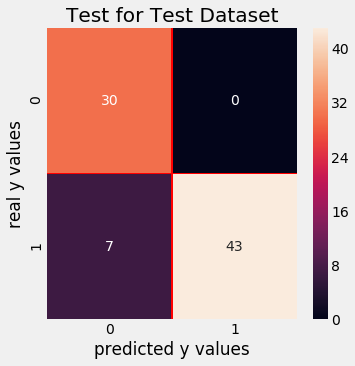

In [74]:
from sklearn.metrics import confusion_matrix  #Class has capital at the begining function starts with small letters 
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

Correct prediction=30+42=72

Wrong predictions =8+0=8

Accuracy of Prediction =(72/80)*100 =90 %

# 6.Conclusion:

1.We have students data like GRE,TOEFL score,University Rating,SOP,LOR,Research.We have renamed the columns,dropped unwanted features from our dataset.

2.From EDA we can see that CGPA,GRE,TOEFL,University Ranking has the highest correlation with the chance of admission to the university.The other parameters like SOP,LOR and Research has less impact on the chance of admission.We can dropt he column Srno from our dataframe as it doesnt have any impact on the chance of admission.

3.We can see that 55% Students have done Research.It possible only the better student could get a chance for doing research.Doing research does add practical knowledge and increases the student skill of working with groups or teams.We can clearly see that students with higher GRE and TOEFL scores have very high chance of getting an university admission.

4.For having a 90% Chance to get admission one should have GRE=333.61,TOEFL=116.28,CGPA=9.53 .If you get scores more than this then your chances of admission are very good.We can clearly see that the student with research have higher chance of admission and their overall all GRE,TOEFL and CPGA scores are also high.We can see that 59% of the student have high chance of Admission.From the decision tree algorithm CGPA and GRE Score are most important feature for predicting the chance of admission.

5.We have used Linear,Decision Tree,Logistic Regression,Kmeans classification,K Means Clustering and ANN to draws inference from the dataset.

# TO BE CONTINUED 